

---



---

# Decision Trees Regression


---



---
Decision Trees Regression is a supervised learning algorithm used for regression tasks. It works by recursively partitioning the feature space into smaller regions and predicting the average target value within each region. It's capable of handling both numerical and categorical data, and it's relatively easy to interpret. However, it's prone to overfitting, especially with deep trees, and sensitive to small variations in the training data. Regularization techniques and ensemble methods like Random Forests can help mitigate these issues.

- **How Decision Trees work**:
  - `DecisionTreeRegressor` constructs a decision tree from the training data, where each internal node represents a splitting condition based on a feature, and each leaf node represents a predicted value. 
  - It recursively partitions the feature space to minimize the mean squared error (MSE) or other impurity measures.
  - [Scikit Learn - Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
  - <img src ='https://miro.medium.com/v2/resize:fit:1400/1*E2br87UjCErSE2eqJ56DWQ.png' width = 700> 

# Generate  the dataset
 Generate synthetic data for regression:
- Features (X) are generated from a uniform distribution between 0 and 1.
- Targets (y) are generated using a quadratic function with added Gaussian noise.


In [ ]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples in the training set
m = 200

# Generate feature data X from a uniform distribution between 0 and 1
X = np.random.rand(m, 1)

# Generate target data y using a quadratic function with added Gaussian noise
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

#Setup the model

This code initializes and fits a Decision Tree regressor to the provided data (`X`, `y`). The regressor is configured with a maximum depth of 2 (`max_depth=2`) and a fixed random state (`random_state=42`).

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree regressor with max_depth=2 and random_state=42
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

# Fit the Decision Tree regressor to the data
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2, random_state=42)

The code trains two Decision Tree regressors with different maximum depths (`max_depth`) and visualizes their predictions.

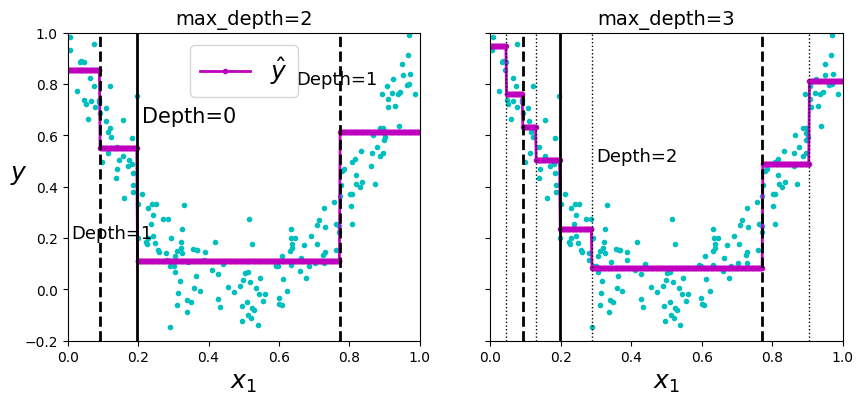

In [ ]:
# Importing the DecisionTreeRegressor class
from sklearn.tree import DecisionTreeRegressor

# Initializing two Decision Tree regressors with different maximum depths
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)

# Fitting the regressors to the data
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

import matplotlib.pyplot as plt

# Function to plot regression predictions
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "c.")
    plt.plot(x1, y_pred, "m.-", linewidth=2, label=r"$\hat{y}$")

# Create subplots for visualization
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot regression predictions for the first tree regressor
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# Plot regression predictions for the second tree regressor
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

# Display the plot

plt.show()


This code defines a function `save_fig()` to save figures generated during data visualization. It sets up the directory path for saving images based on the project root directory, chapter ID, and specific image path. If the directory doesn't exist, it creates it. The function then saves the figure with the given ID and specified parameters like tight layout, file extension, and resolution.

In [ ]:
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

The code exports the visualization of a decision tree (`tree_reg1`) to a DOT file using the `export_graphviz` function

In [ ]:
from sklearn.tree import export_graphviz

# Export the decision tree visualization to a DOT file
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )


This code utilizes the `Source` class from the `graphviz` library to load the decision tree visualization stored in a DOT file. The file path is constructed using `os.path.join` to locate the DOT file in the specified `IMAGES_PATH` directory.

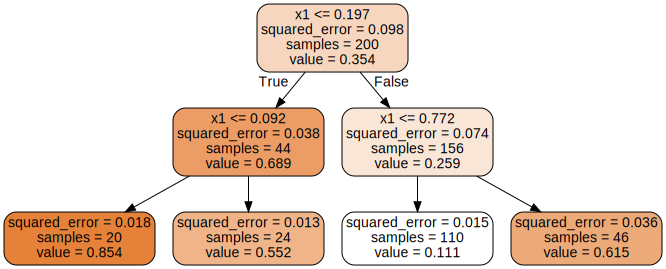

In [ ]:
from graphviz import Source
# Load the decision tree visualization from the DOT file
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

This code defines and trains two Decision Tree regressors with different levels of regularization. It then plots the predictions of both models.

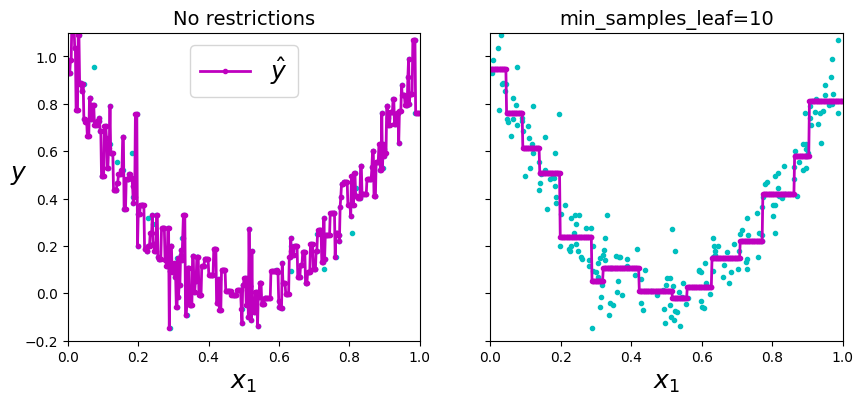

In [ ]:
# Define and train two decision tree regressors with different levels of regularization
#`min_samples_leaf` specifies the minimum number of samples required to be at a
# leaf node during decision tree construction

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Generate input data for prediction
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

# Predictions of both models on the input data
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

# Plot the predictions of both models
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Subplot 1: Decision tree without restrictions
plt.sca(axes[0])
plt.plot(X, y, "c.")  # Original data points
plt.plot(x1, y_pred1, "m.-", linewidth=2, label=r"$\hat{y}$")  # Predictions
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

# Subplot 2: Decision tree with min_samples_leaf=10
plt.sca(axes[1])
plt.plot(X, y, "c.")  # Original data points
plt.plot(x1, y_pred2, "m.-", linewidth=2, label=r"$\hat{y}$")  # Predictions
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

# Display the plot

plt.show()
